<a href="https://colab.research.google.com/github/CristianoDataScience/Projeto_Aplicado_SRAG/blob/main/classificacao_e_correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive

## Importando Base de Dados SRAG

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Projeto_Aplicado_SRAG/base_dados_srag_sp.csv',sep=',', encoding='iso-8859-1')

In [62]:
df = df.rename(columns={'minicipio': 'municipio'})
df = df.dropna()

In [63]:
# alterando tipo de coluna
df = df.astype({
    'data': 'datetime64'

})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865303 entries, 0 to 865348
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   data            865303 non-null  datetime64[ns]
 1   municipio       865303 non-null  object        
 2   idade           865303 non-null  int64         
 3   sexo            865303 non-null  object        
 4   srag            865303 non-null  object        
 5   evolucao        865303 non-null  object        
 6   qtde_masculino  865303 non-null  int64         
 7   qtde_feminino   865303 non-null  int64         
 8   total           865303 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 66.0+ MB


## Gráfico Municipios com maiores casos

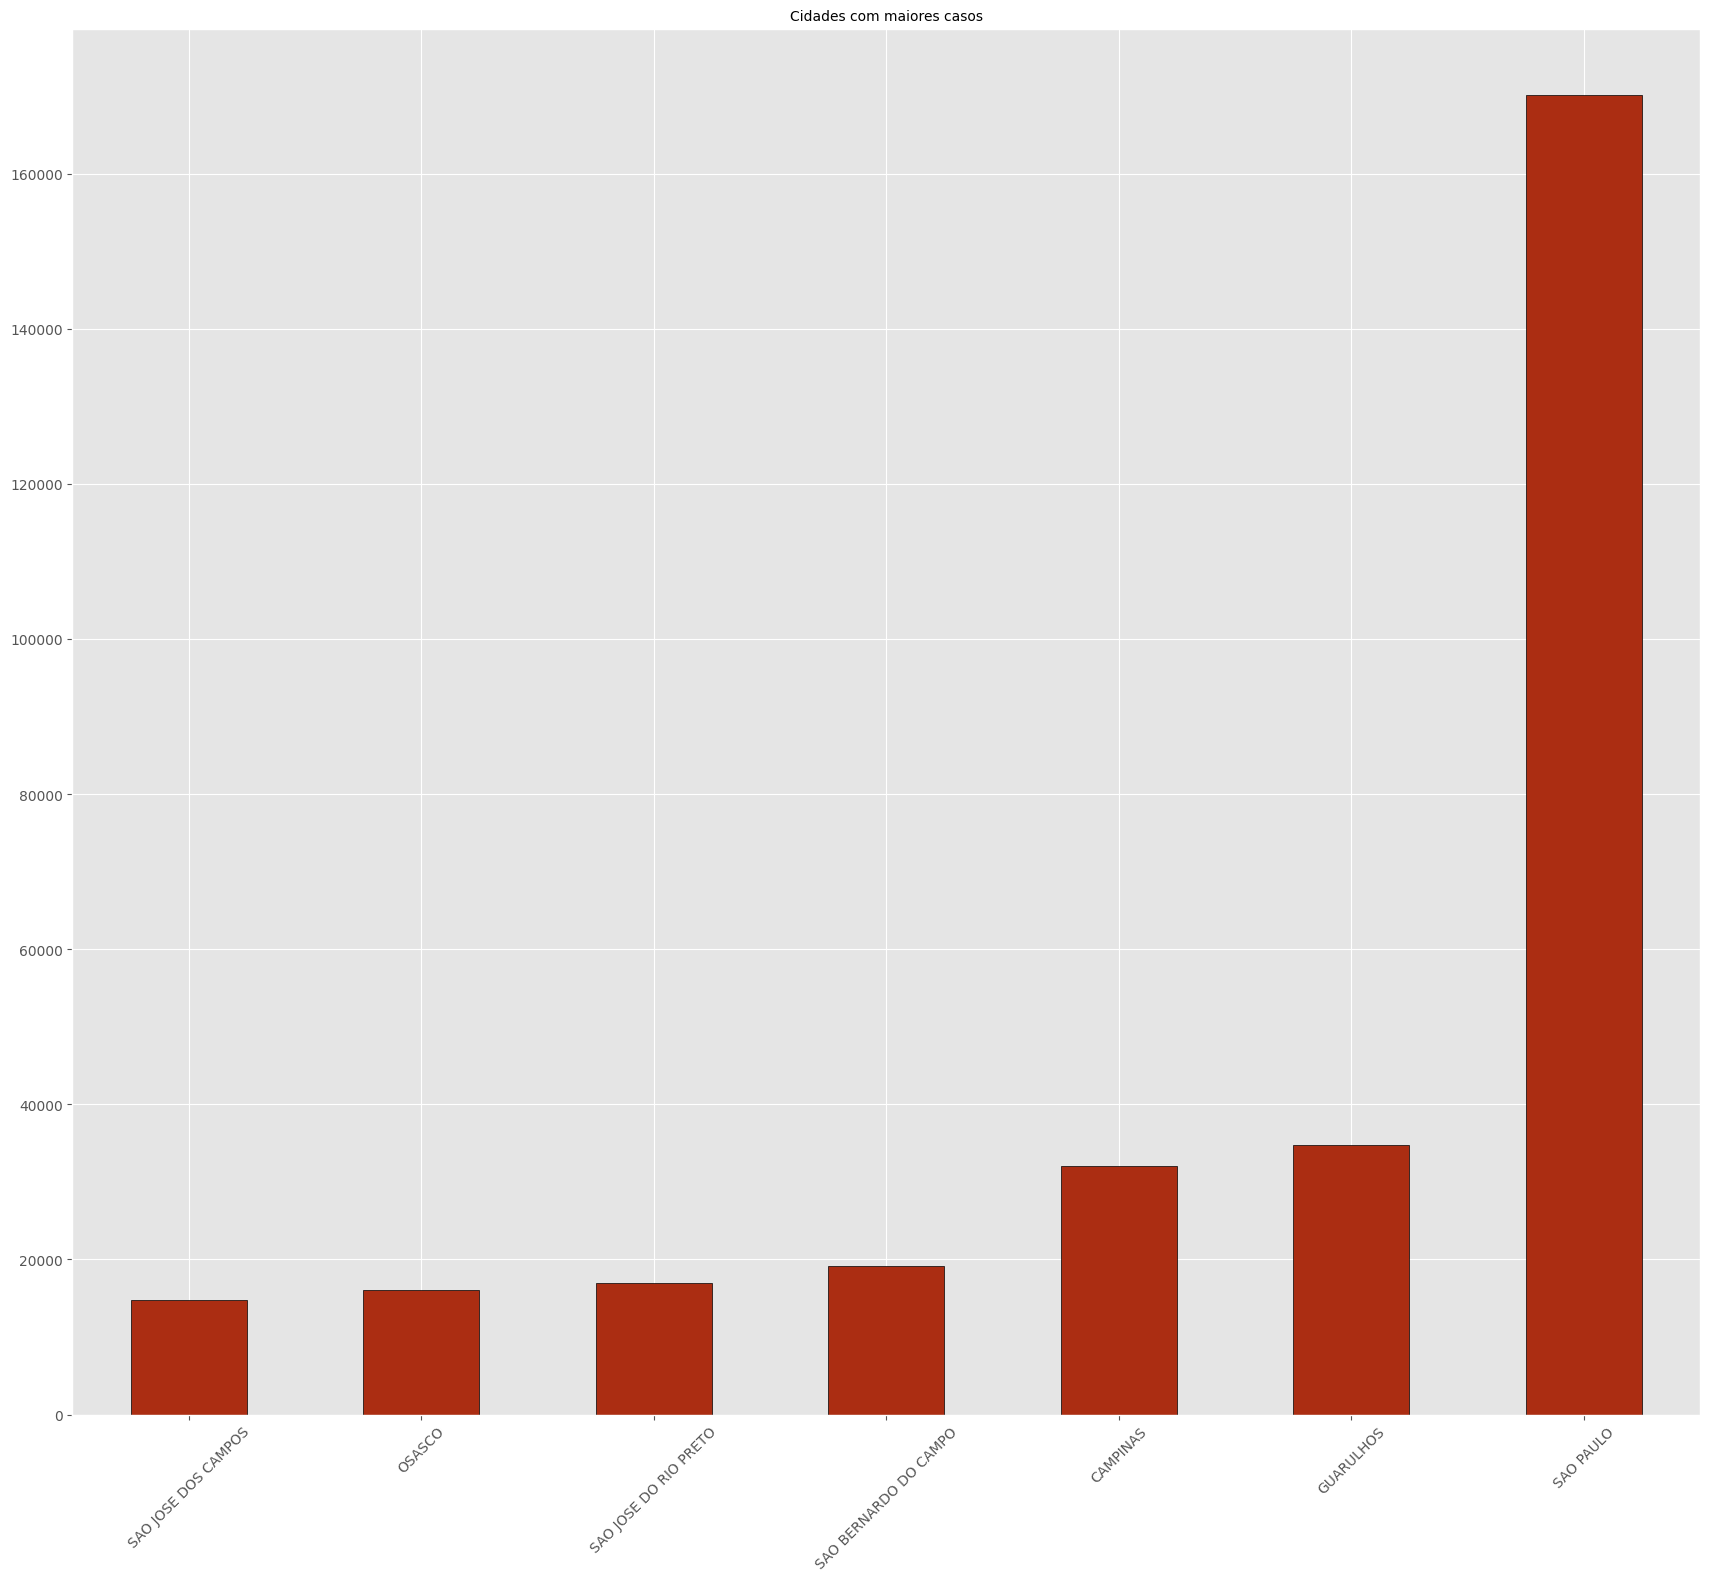

In [64]:
df.groupby('municipio').size().sort_values().tail(7).plot(kind='bar',color= '#AB2D12',edgecolor='black')
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (21, 18) #Tamanho
plt.title('Cidades com maiores casos',fontsize=10 ) #Título do gráfico
plt.xticks(rotation=45) # Rotacionar os nomes das cidades
plt.xlabel('')
plt.show()

In [65]:
df.municipio.value_counts().head(20).to_frame('total')

,total
SAO PAULO,170233
GUARULHOS,34767
CAMPINAS,32032
SAO BERNARDO DO CAMPO,19167
SAO JOSE DO RIO PRETO,16920
OSASCO,16123
SAO JOSE DOS CAMPOS,14793
SOROCABA,14549
RIBEIRAO PRETO,14546
SANTO ANDRE,12951


In [66]:
df_cor = df[['municipio', 'idade', 'sexo', 'srag', 'qtde_masculino', 'qtde_feminino', 'total']]

In [67]:
df_cor.isnull().sum()

municipio         0
idade             0
sexo              0
srag              0
qtde_masculino    0
qtde_feminino     0
total             0
dtype: int64

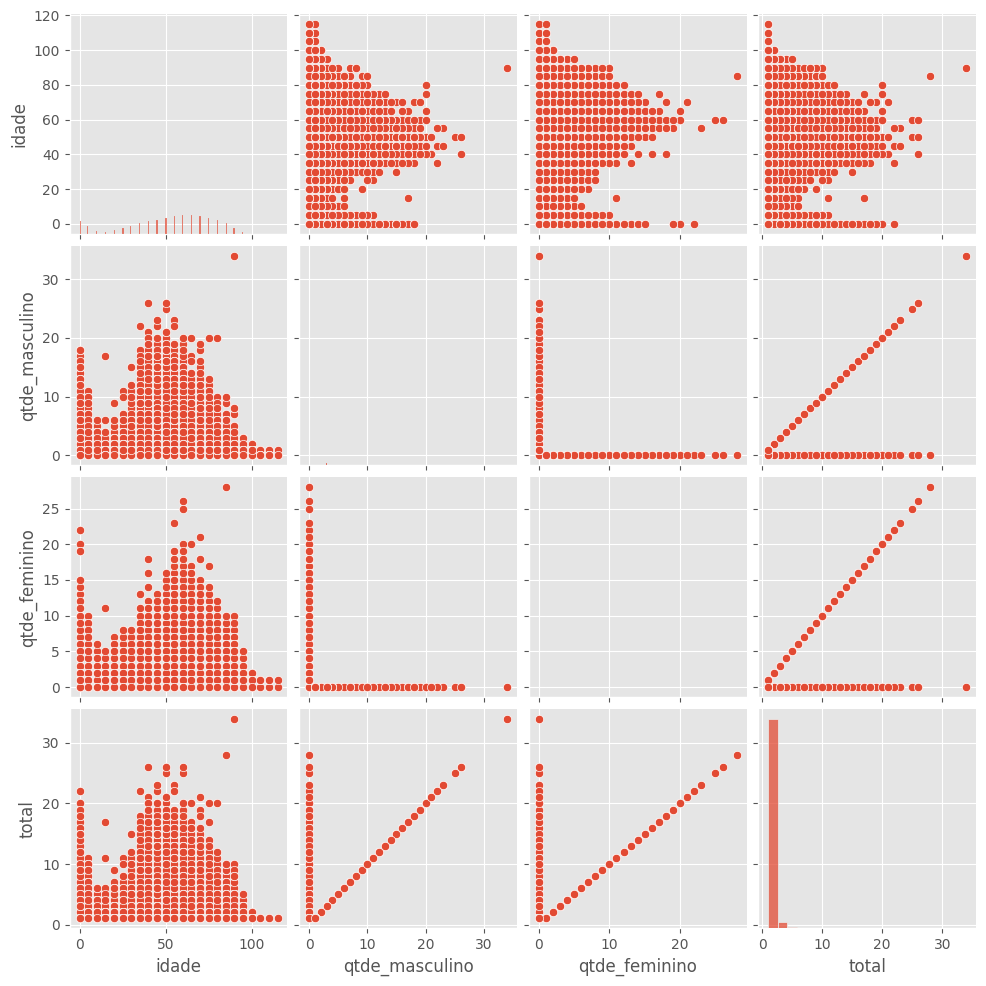

In [68]:
sns.pairplot(df_cor);

In [69]:
df_sp = df[df['municipio'] == 'SAO PAULO']

In [70]:
fig = px.scatter(df_sp, x="idade", y="total", color="sexo", title= "Correlação do total de casos por Idade")
fig.show()

In [71]:
# Correlação de Pearson
correlacoes = df_sp.corr(method='pearson')
correlacoes

<ipython-input-71-fb1f8417fda2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,idade,qtde_masculino,qtde_feminino,total
idade,1.000000,-0.073170,0.006408,-0.066185
qtde_masculino,-0.073170,1.000000,-0.384245,0.664363
qtde_feminino,0.006408,-0.384245,1.000000,0.434753
total,-0.066185,0.664363,0.434753,1.000000


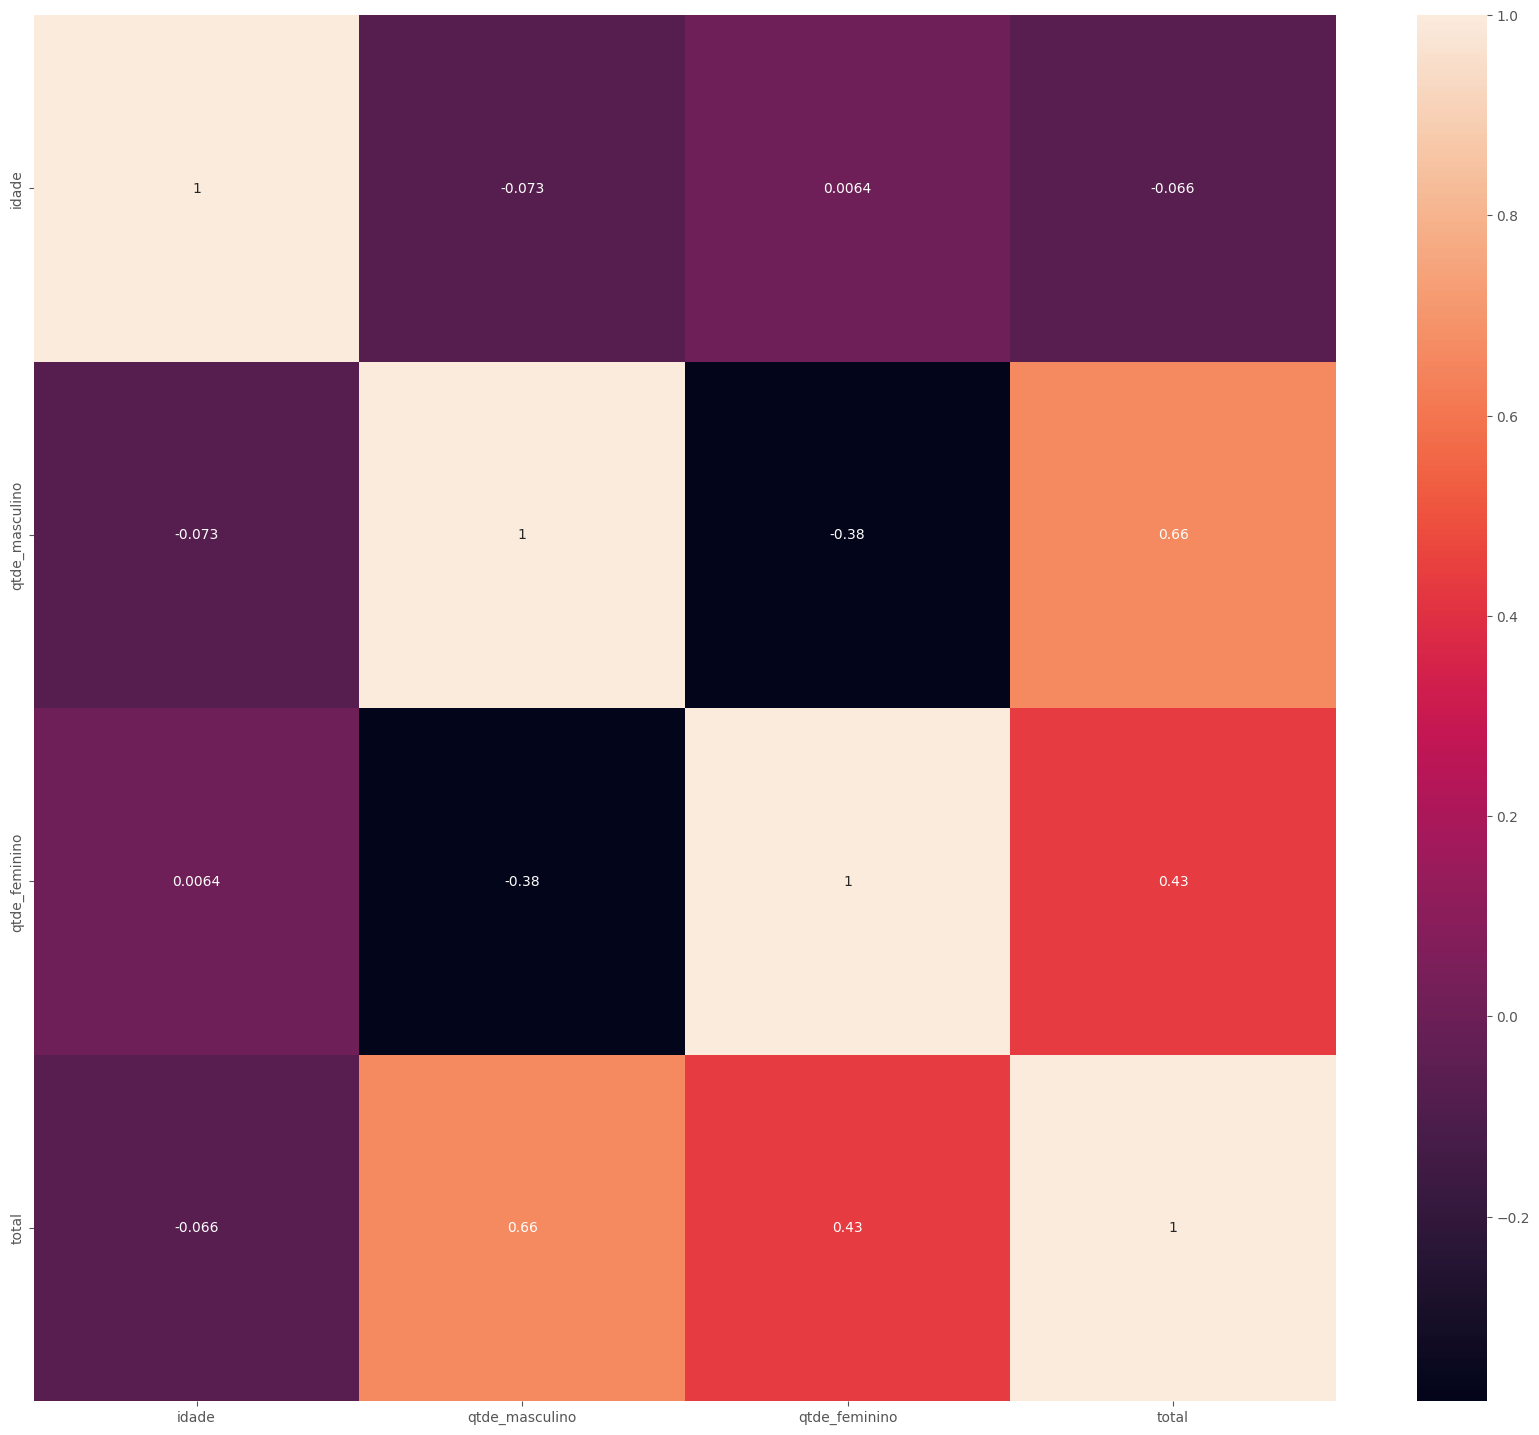

In [72]:
sns.heatmap(correlacoes, annot=True);

## Análise da Normalidade
### Teste Shapiro-Wilk
___
## Ho = média é igual a de São Paulo: p > 0,05
## Ha = média é diferente da de São Paulo: p <= 0,05

In [73]:
import scipy.stats as stats

In [74]:
# Nota de redação
stats.shapiro(df_sp.total)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.5331088304519653, pvalue=0.0)

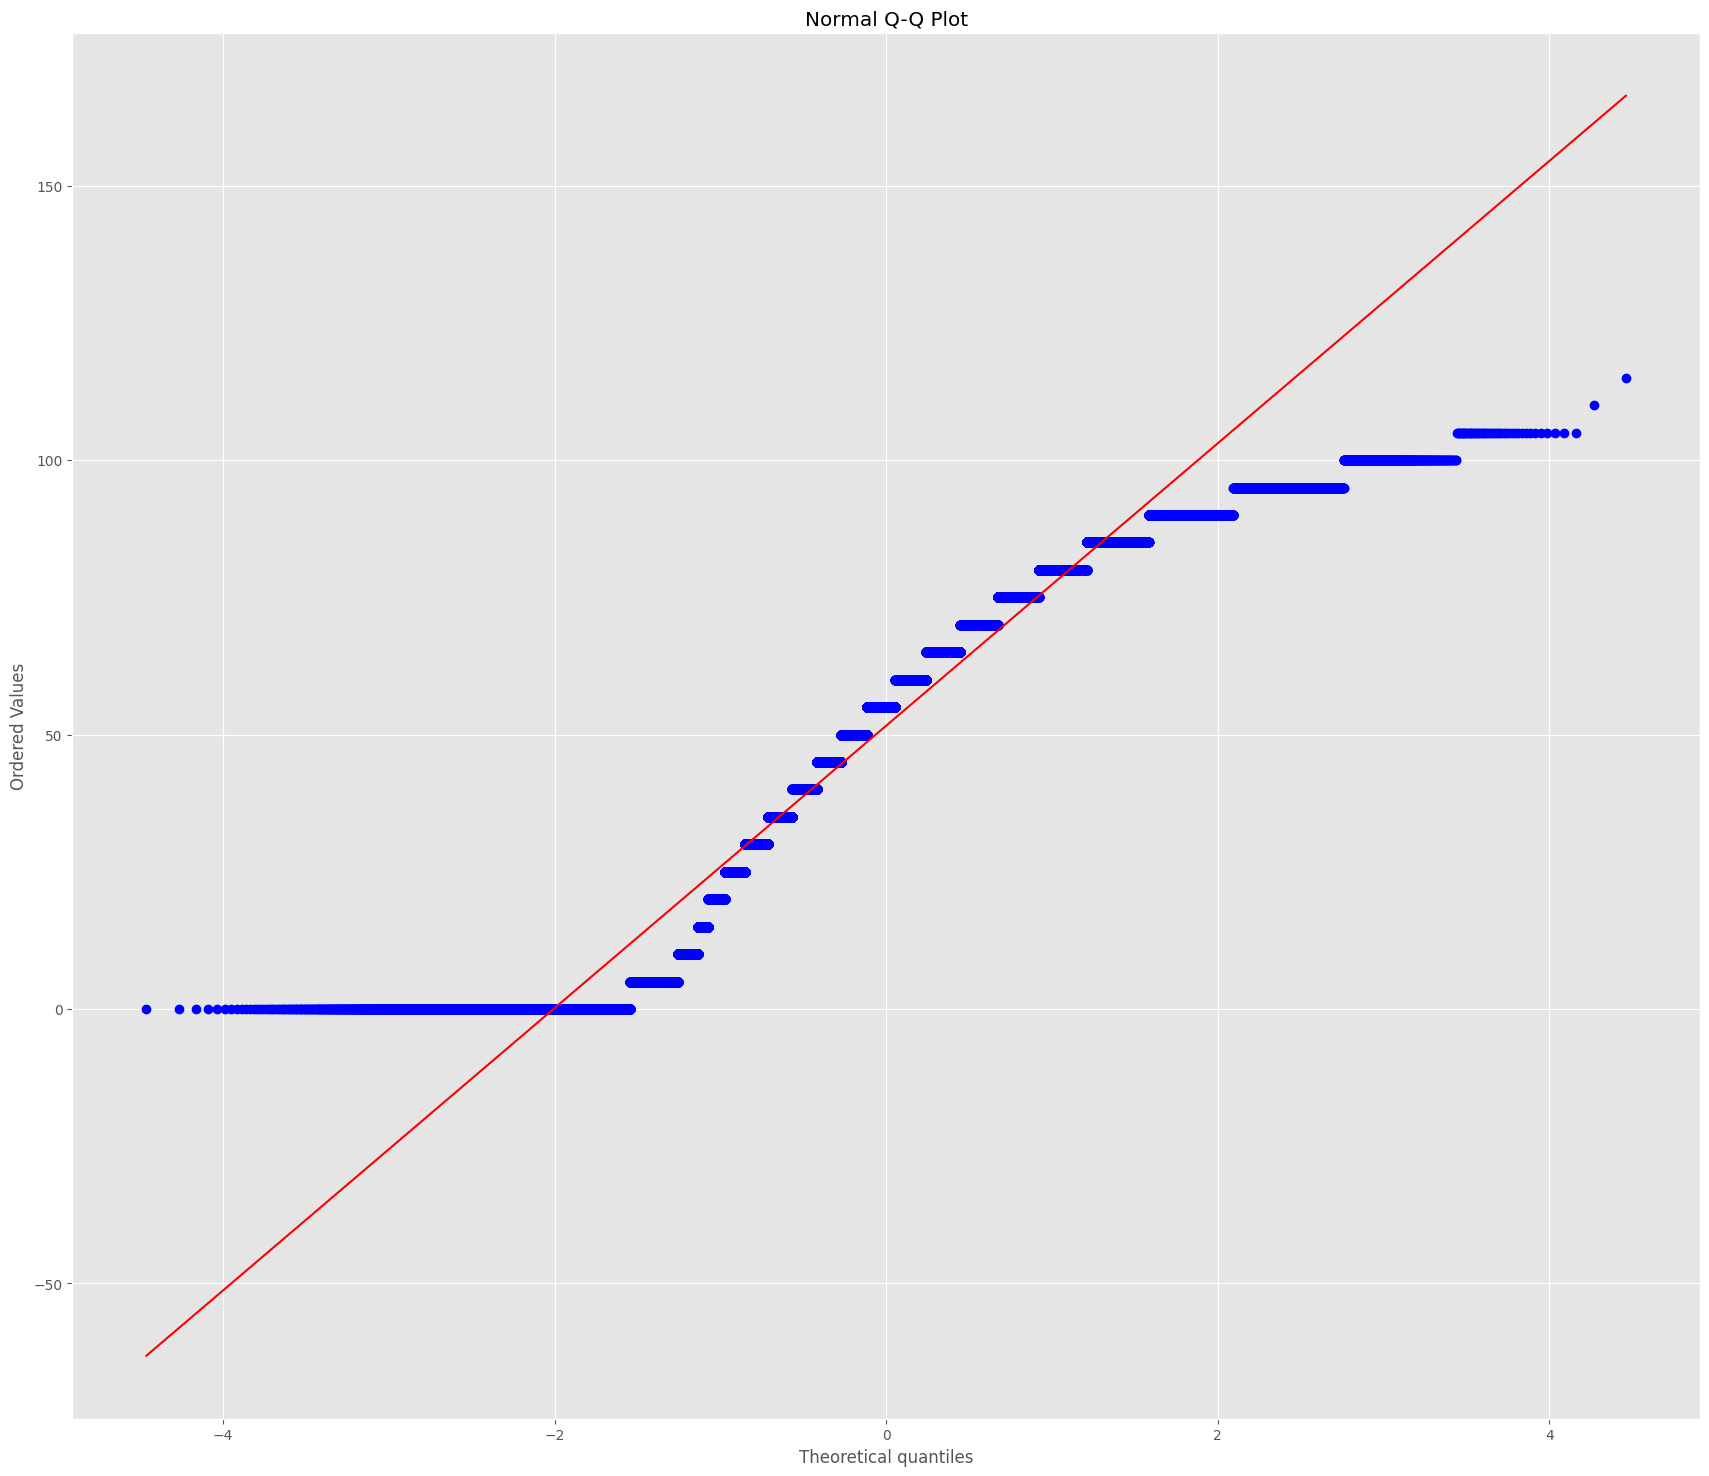

In [75]:
stats.probplot(df_sp['idade'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## Regressão
### Regressão Linear com Statsmodels

In [76]:
import statsmodels.formula.api as smf
import statsmodels.stats as sms

In [77]:
regressao = smf.ols('idade ~ total', data = df_sp).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  idade   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     749.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.54e-164
Time:                        17:03:43   Log-Likelihood:            -7.9850e+05
No. Observations:              170233   AIC:                         1.597e+06
Df Residuals:                  170231   BIC:                         1.597e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.5432      0.095    562.719      0.0

In [78]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept     53.543163
total         -1.092824


In [79]:
regressao.predict()

array([45.89339601, 52.45033927, 51.35751539, ..., 52.45033927,
       52.45033927, 52.45033927])

In [80]:
residuos = regressao.resid
residuos

1         -5.893396
2         12.549661
3        -26.357515
5        -42.450339
6        -42.450339
            ...    
865327    37.549661
865332    32.549661
865334    -2.450339
865336    -7.450339
865345     7.549661
Length: 170233, dtype: float64

In [81]:
df_sp = df_sp.sort_values(by='idade')
df_sp

,data,municipio,idade,sexo,srag,evolucao,qtde_masculino,qtde_feminino,total
673932,2022-06-02,SAO PAULO,0,Masculino,Covid-19,Em Avaliação,1,0,1
724128,2022-07-10,SAO PAULO,0,Masculino,Outras SRAG,Em Avaliação,1,0,1
433771,2021-02-05,SAO PAULO,0,Feminio,Covid-19,Em Avaliação,0,1,1
129399,2021-08-21,SAO PAULO,0,Feminio,Outras SRAG,Cura,0,3,3
41901,2022-05-23,SAO PAULO,0,Feminio,Covid-19,Cura,0,2,2
...,...,...,...,...,...,...,...,...,...
604458,2021-01-24,SAO PAULO,105,Masculino,Covid-19,Óbito,1,0,1
136670,2020-07-01,SAO PAULO,105,Masculino,Outras SRAG,Cura,1,0,1
120378,2022-01-24,SAO PAULO,105,Feminio,Covid-19,Em Avaliação,0,1,1
113027,2022-11-10,SAO PAULO,110,Masculino,Outras SRAG,Em Avaliação,1,0,1


In [82]:
# Salvando base de dados df_SP
df_sp.to_csv('base_dados_sp.csv', encoding = 'utf-8', index= False)